# 1. Load the dataset into python environment

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading dataset
data = pd.read_csv('titanic_dataset.csv')

In [3]:
# displaying first 5 rows of dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [4]:
data = pd.read_csv('titanic_dataset.csv', index_col ='PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [6]:
# Checking shape of dataset
data.shape

(891, 11)

The dataset has 891 rows and 11 columns

In [7]:
# Checking data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
# Checking for null values in the dataset
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

The dataset has 177 missing values in the Age column, 687 in the cabin column, and 2 missing values in Embarked column.

# 4. Fill in all the missing values present in all the columns in the dataset

In [123]:
# Checking data types
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

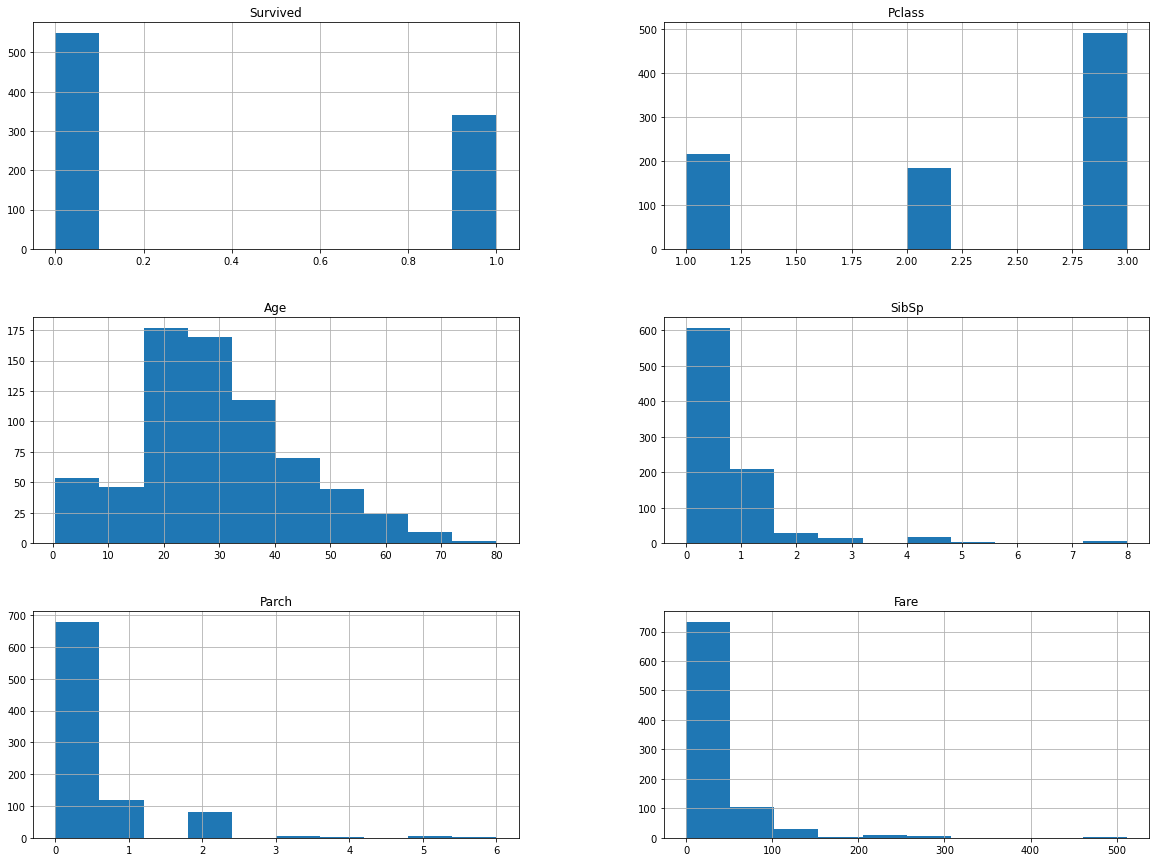

In [10]:
# Checking for skewness of data
freqgraph = data.select_dtypes(include = ['float','int64'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [11]:
# Testing for skewness
from scipy.stats import skew
print(skew(data['Age']))

nan


 Age is not skewed, ie, it's a normal distribution.So we need to fill the missing values with median.

In [12]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [13]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
# In cabin column more than 75% of the data is missing. Hence it's better to drop the column for a good output. 
# But here in the question it's clearly mentioned to fill all the missing values. 
# Since cabin is a categorical data we can fill the missing values with mode

In [15]:
data['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
E101           3
              ..
B73            1
D15            1
A10            1
D46            1
A16            1
Name: Cabin, Length: 147, dtype: int64

In [16]:
# Checking for mode
data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [17]:
# It is a multimodal data. So we can fill the missing values with any of these modes.
# Here I am filling the missing values with G6

In [18]:
data['Cabin']= data['Cabin'].fillna('G6')

In [19]:
data.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,G6,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,G6,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,G6,S


In [20]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [21]:
# Finding null values in the column 'Embarked'
data[data['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
# Calculating mode of 'Embarked'
modus_emb = data['Embarked'].mode()[0]
print(modus_emb)

S


In [23]:
# Filling null values with mode
data['Embarked'] = data['Embarked'].fillna(modus_emb)

In [24]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [25]:
data.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin       False
Embarked    False
dtype: bool

Now our data has no more null values.

# 5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Box plot of fare')

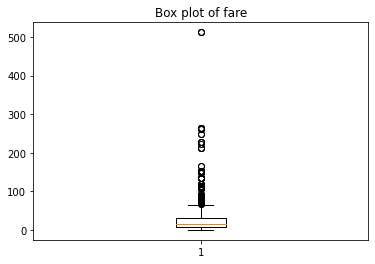

In [26]:
# Handling outliers in Fare Column
plt.boxplot(data['Fare'])
plt.title('Box plot of fare')

In [27]:
# Here we have outliers. We will use inter quartile range (IQR) to manage outliers.
# Normally the datapoints which fall below Q1-1.5(iqr) and above Q3+1.5(iqr) are considered as outliers.

In [28]:
Q1 = np.percentile(data['Fare'],25, interpolation ='midpoint')
Q2 = np.percentile(data['Fare'],50, interpolation = 'midpoint')
Q3 = np.percentile(data['Fare'],75, interpolation = 'midpoint')

In [29]:
IQR = Q3-Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(lower_limit)
print(upper_limit)

-26.724
65.6344


In [30]:
# Finding outlier values in the column
outlier = []
for x in data['Fare']:
    if ((x < lower_limit) or (x > upper_limit)):
        outlier.append(x)
print(outlier)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


Here we have all the upper limit values as outliers

In [31]:
# finding the index values of outlier
ind1 = data['Fare'] > upper_limit
data.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [32]:
# Dropping all outliers
data.drop((data.loc[ind1].index), inplace = True)

Text(0.5, 1.0, 'Box plot of fare after removing outliers')

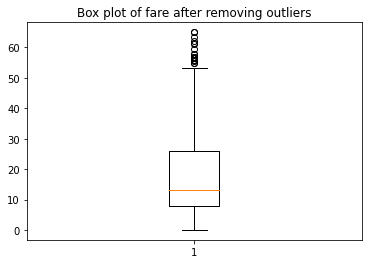

In [33]:
# Box plot
plt.boxplot(data['Fare'])
plt.title('Box plot of fare after removing outliers')

Now we can see that our outliers are reduced.

Text(0.5, 1.0, 'Age')

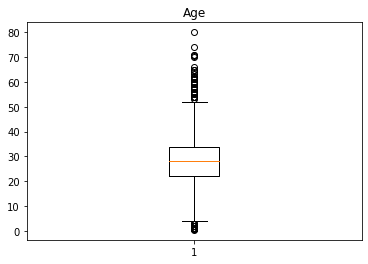

In [34]:
# Handling outliers in age column
plt.boxplot(data['Age'])
plt.title('Age')

In [35]:
# There are too many outliers in the data.

In [36]:
Q1 = np.percentile(data['Age'],25, interpolation ='midpoint')
Q2 = np.percentile(data['Age'],50, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'],75, interpolation = 'midpoint')
IQR = Q3-Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(lower_limit)
print(upper_limit)


4.0
52.0


In [37]:
# Finding outlier values in the column
outlier = []
for x in data['Age']:
    if ((x < lower_limit) or (x > upper_limit)):
        outlier.append(x)
print(outlier)

[54.0, 2.0, 58.0, 55.0, 2.0, 66.0, 3.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 3.0, 2.0, 59.0, 54.0, 62.0, 3.0, 65.0, 54.0, 61.0, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 54.0, 2.0, 64.0, 62.0, 62.0, 53.0, 54.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 70.0, 60.0, 60.0, 0.67, 57.0, 54.0, 1.0, 0.42, 2.0, 1.0, 0.83, 74.0]


In [38]:
# finding the index values of outlier
ind1 = data['Age'] > upper_limit
data.loc[ind1].index

Int64Index([  7,  12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 233, 250,
            253, 281, 318, 327, 457, 468, 484, 488, 493, 494, 514, 546, 556,
            571, 572, 583, 626, 627, 631, 648, 673, 685, 695, 773, 775, 852],
           dtype='int64', name='PassengerId')

In [39]:
# Dropping all outliers
data.drop((data.loc[ind1].index), inplace = True)

Text(0.5, 1.0, 'Box plot of Age after removing outliers')

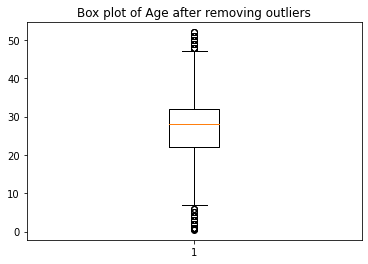

In [40]:
# Box Plot
plt.boxplot(data['Age'])
plt.title('Box plot of Age after removing outliers')

Now we can see that our outliers are reduced.

Text(0.5, 1.0, 'SibSp ')

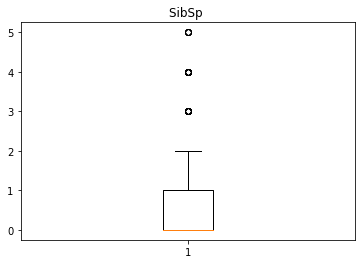

In [42]:
# Handling outliers in SibSp  column
plt.boxplot(data['SibSp'])
plt.title('SibSp ')

We have some outliers in our data

In [43]:
# Handling outliers
Q1 = np.percentile(data['SibSp'],25, interpolation ='midpoint')
Q2 = np.percentile(data['SibSp'],50, interpolation = 'midpoint')
Q3 = np.percentile(data['SibSp'],75, interpolation = 'midpoint')
IQR = Q3-Q1
upper_limit = Q3 + 1.65 * IQR
lower_limit = Q1 - 1.65 * IQR
print(lower_limit)
print(upper_limit)
print(IQR)

-1.65
2.65
1.0


In [44]:
# Finding outlier values in the column
outlier = []
for x in data['SibSp']:
    if ((x < lower_limit) or (x > upper_limit)):
        outlier.append(x)
print(outlier)

[3, 4, 3, 4, 5, 3, 4, 5, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 4, 3, 4, 4]


In [45]:
# finding the index values of outlier
ind1 = data['SibSp'] > upper_limit
data.loc[ind1].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [46]:
# Dropping all outliers
data.drop((data.loc[ind1].index), inplace = True)

Text(0.5, 1.0, 'Box plot of SibSp after removing outliers')

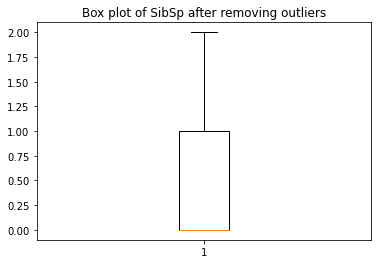

In [47]:
# Box Plot
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp after removing outliers')

Now all of our outliers are removed

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

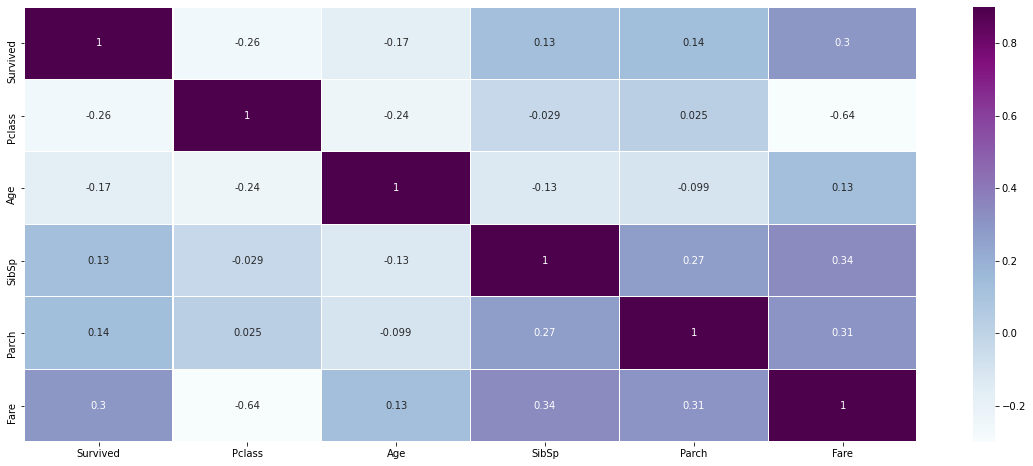

In [100]:
# Checking correlation in our data set
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, annot = True,vmax = 0.9, vmin = -0.3, linewidths = 0.2, cmap="BuPu")
plt.show()

In [101]:
# Selecting only non categorical data
data1 = data[['Age','Pclass','SibSp','Parch','Fare','Survived']]

In [103]:
# display data1
data1

,Age,Pclass,SibSp,Parch,Fare,Survived
PassengerId,,,,,,
1,22.0,3,1,0,7.2500,0
3,26.0,3,0,0,7.9250,1
4,35.0,1,1,0,53.1000,1
5,35.0,3,0,0,8.0500,0
6,28.0,3,0,0,8.4583,0
...,...,...,...,...,...,...
887,27.0,2,0,0,13.0000,0
888,19.0,1,0,0,30.0000,1
889,28.0,3,1,2,23.4500,0


In [104]:
# Defining independent and dependent variables
X = data1.drop('Survived', axis=1)
y = data1['Survived']

In [105]:
# Statistical summary of X
X.describe()

,Age,Pclass,SibSp,Parch,Fare
count,700.000000,700.000000,700.000000,700.000000,700.000000
mean,27.881786,2.500000,0.281429,0.295714,16.725761
std,9.978614,0.716653,0.509647,0.763797,13.195905
min,0.420000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,2.000000,0.000000,0.000000,7.878150
50%,28.000000,3.000000,0.000000,0.000000,10.500000
75%,32.125000,3.000000,1.000000,0.000000,23.587500
max,52.000000,3.000000,2.000000,6.000000,65.000000


In [109]:
# Minmax scaling is done to convert all our values in the range 0-1.
# Let's import preprocessing from sklearn library and do minmax scaling
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)
X = pd.DataFrame(X)

In [110]:
X.head()

,0,1,2,3,4
0,0.418379,1.0,0.5,0.0,0.111538
1,0.495929,1.0,0.0,0.0,0.121923
2,0.670415,0.0,0.5,0.0,0.816923
3,0.670415,1.0,0.0,0.0,0.123846
4,0.534703,1.0,0.0,0.0,0.130128


In [111]:
X.describe()

,0,1,2,3,4
count,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.532412,0.750000,0.140714,0.049286,0.257319
std,0.193459,0.358326,0.254824,0.127300,0.203014
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.418379,0.500000,0.000000,0.000000,0.121202
50%,0.534703,1.000000,0.000000,0.000000,0.161538
75%,0.614676,1.000000,0.500000,0.000000,0.362885
max,1.000000,1.000000,1.000000,1.000000,1.000000


From the output from the above cells, we can see that our data is scaled.

In [112]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 100, test_size = 0.2)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('MSE is:',mean_squared_error(y_test, predictions))

MSE is: 0.18030177866425331


Our MSE value is low which means scaling has no adverse effect on our model.